# **Identifikasi Outlier dengan K-Nearest Neighbors (KNN) dalam Pemahaman Data**
## 1. Mengapa KNN Bisa Digunakan untuk Deteksi Outlier?  
K-Nearest Neighbors (KNN) bisa digunakan untuk deteksi outlier karena algoritma ini bekerja berdasarkan kedekatan dan kepadatan data di sekitarnya. Berikut adalah beberapa alasan utama:

1. Mengukur Jarak dari Titik ke Tetangganya
KNN menghitung jarak antara titik data dan tetangga terdekatnya. Jika sebuah titik memiliki jarak yang jauh lebih besar dibandingkan titik lain di sekitarnya, maka kemungkinan besar titik tersebut adalah outlier.

2. Berdasarkan Kepadatan Data (Density-Based Detection)
KNN bisa digunakan untuk mendeteksi outlier dengan pendekatan kepadatan:
Jika suatu titik memiliki sedikit tetangga dalam radius tertentu, maka titik tersebut kemungkinan outlier.
Sebaliknya, titik yang berada dalam area dengan banyak titik lain dianggap normal.

3. Digunakan dalam Algoritma Local Outlier Factor (LOF)
LOF adalah metode deteksi outlier berbasis KNN yang membandingkan kepadatannya dengan kepadatan tetangganya. Jika suatu titik memiliki kepadatan yang jauh lebih kecil dari tetangganya, maka kemungkinan besar titik tersebut adalah outlier.

4. Fleksibel untuk Data Berstruktur dan Tak Berstruktur
KNN bisa digunakan untuk berbagai jenis data, baik data numerik maupun non-numerik. Ini membuatnya cocok untuk deteksi outlier dalam berbagai bidang, seperti analisis keuangan, deteksi anomali dalam jaringan, dan pengolahan citra.

## 2. Langkah-Langkah Deteksi Outlier dengan KNN  
 Berikut adalah langkah-langkah deteksi outlier menggunakan KNN:

1. Persiapan Data
Kumpulkan dataset yang akan dianalisis.
Pastikan dataset berisi fitur numerik agar KNN dapat menghitung jarak dengan akurat.
Lakukan pembersihan data jika diperlukan (misalnya, menangani nilai yang hilang atau tidak valid).
2. Pilih Jumlah Tetangga (k-Nearest Neighbors)
Tentukan nilai k, yaitu jumlah tetangga yang akan digunakan untuk analisis.
Nilai k yang kecil lebih sensitif terhadap outlier, sedangkan k yang besar lebih stabil tetapi bisa mengabaikan beberapa outlier.
3. Hitung Jarak Antar Titik
Gunakan jarak Euclidean atau metrik lainnya untuk mengukur seberapa dekat setiap titik dengan tetangga-tetangganya.
Misalnya, untuk dua titik A(x 1,y 1) dan 𝐵 (𝑥2,𝑦2)B(x 2​,y 2), jarak Euclidean dihitung sebagai:
d(A,B)= (x 2−x 1) 2+(y 2−y 1)2
4. Hitung Kepadatan Titik (Local Reachability Density - LRD)
Kepadatan lokal dihitung berdasarkan rata-rata jarak ke tetangga terdekatnya.
Titik yang jauh dari kelompoknya akan memiliki kepadatan rendah dibandingkan tetangga lainnya.
5. Hitung Local Outlier Factor (LOF)
LOF adalah rasio kepadatan titik terhadap kepadatan tetangganya.
Jika LOF mendekati 1, titik tersebut normal.
Jika LOF jauh lebih besar dari 1, titik tersebut adalah outlier.
6. Identifikasi dan Analisis Outlier
Tandai titik-titik yang memiliki LOF tinggi sebagai outlier.
Visualisasikan hasilnya menggunakan scatter plot atau box plot untuk melihat distribusi outlier dalam dataset.

## Kesimpulan  
Deteksi outlier dengan KNN dan LOF efektif dalam menemukan titik yang berbeda dari pola umum dalam dataset. Proses ini berguna untuk mendeteksi anomali, membersihkan data, dan meningkatkan kualitas analisis dalam berbagai bidang seperti keuangan, cybersecurity, dan deteksi penipuan

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.9 MB/s eta 0:00:00


Perintah berikut digunakan untuk menginstal pustaka Python yang memungkinkan koneksi ke database:
1. %pip install pymysql → Menginstal pustaka pymysql, yang digunakan untuk menghubungkan Python dengan MySQL atau MariaDB menggunakan protokol MySQL asli.
2. %pip install psycopg2 → Menginstal pustaka psycopg2, yang digunakan untuk menghubungkan Python dengan PostgreSQL, mendukung transaksi, dan menjalankan kueri SQL.

 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier_knn
  1     Iris-setosa           1.4          0.2           5.1          3.5      4.028647        False
  3     Iris-setosa           1.7          0.5           4.7          3.2      3.742993        False
  4     Iris-setosa           1.1          0.3           4.6          3.1      4.353160        False
  5     Iris-setosa           1.4          0.2           5.0          3.6      4.060788        False
  6     Iris-setosa           1.7          0.4           5.4          3.9      3.712142        False
  7     Iris-setosa           0.9          1.1           4.6          3.4      4.370355        False
  8     Iris-setosa           1.1          1.1           5.0          3.4      4.037326        False
 10     Iris-setosa           1.3          1.0           4.9          3.1      3.879433        False
 11     Iris-setosa           1.5          0.2           5.4          3.7      3.885872    

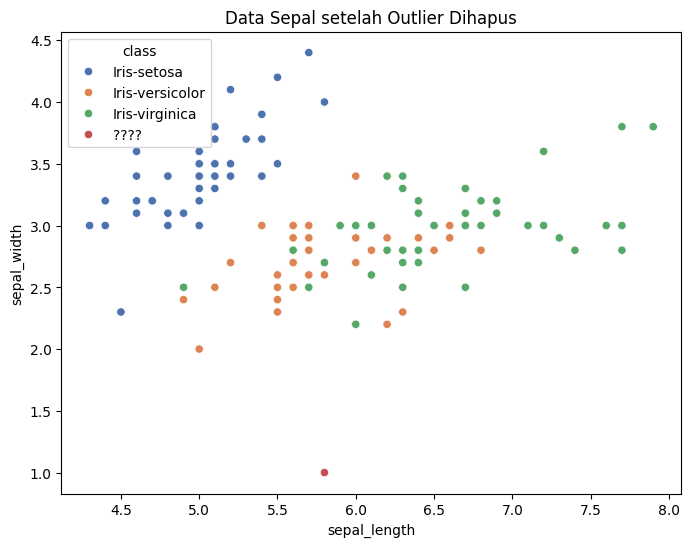

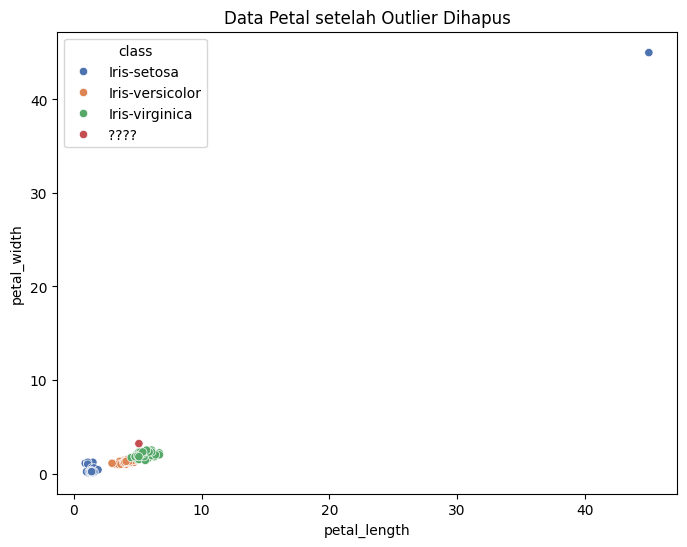

In [ ]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-1c79828e-posgressqlpendata.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_lNd8P_-IyQzpcnKg3Ye",
        database="defaultdb",
        port=14572
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM bunga")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-3f95b8aa-mysqll.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_DYTBfDjLFuF2XVSXIqF",
        database="flowers_mysql",
        port=12288
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowermysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# KNN Outlier Detection
def knn_outlier_detection(data, k=90):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    avg_distances = distances[:, -1]  # Ambil jarak k-terjauh sebagai skor
    return avg_distances

# Hitung K-NN distance
df_merged["knn_distance"] = knn_outlier_detection(data_values, k=90)

# Tentukan threshold sebagai nilai rata-rata + 2 standar deviasi
threshold = df_merged["knn_distance"].mean() + 2 * df_merged["knn_distance"].std()
df_merged["outlier_knn"] = df_merged["knn_distance"] > threshold

# Hapus data outlier
df_filtered = df_merged[~df_merged["outlier_knn"]]

# Cetak hasil setelah outlier dihapus
print(df_filtered.to_string(index=False))
print(f"\nJumlah data setelah outlier dihapus: {len(df_filtered)}")

# Visualisasi setelah outlier dihapus
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_filtered["sepal_length"], y=df_filtered["sepal_width"],
    hue=df_filtered["class"], palette="deep"
)
plt.title("Data Sepal setelah Outlier Dihapus")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_filtered["petal_length"], y=df_filtered["petal_width"],
    hue=df_filtered["class"], palette="deep"
)
plt.title("Data Petal setelah Outlier Dihapus")
plt.show()

Kode ini melakukan deteksi outlier menggunakan metode K-Nearest Neighbors (KNN) pada dataset Iris yang diperoleh dari dua database (MySQL dan PostgreSQL).

Data dari kedua database digabungkan berdasarkan kolom "id" dan "class", lalu fitur numerik (petal_length, petal_width, sepal_length, sepal_width) digunakan untuk perhitungan jarak dengan algoritma KNN.

Jarak ke tetangga ke-5 dihitung untuk setiap titik sebagai indikator outlier, kemudian outlier diidentifikasi berdasarkan threshold rata-rata jarak ditambah 2 standar deviasi. Hasilnya:

Jumlah outlier dihitung dan ditampilkan dalam dataframe.
Data outlier ditampilkan secara eksplisit.
Visualisasi scatter plot dibuat untuk menunjukkan distribusi outlier pada Sepal dan Petal, dengan titik outlier berwarna merah.

# MEMISAHKAN OUTLIER DARI DATA

In [ ]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay


def get_pg_data():
    conn = psycopg2.connect(
        host="pg-1c79828e-posgressqlpendata.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_lNd8P_-IyQzpcnKg3Ye",
        database="defaultdb",
        port=14572
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM bunga")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-3f95b8aa-mysqll.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_DYTBfDjLFuF2XVSXIqF",
        database="flowers_mysql",
        port=12288
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowermysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa           1.4          0.2           5.1          3.5              1
  2     Iris-setosa          70.0         88.0          40.9         30.0             -1
  3     Iris-setosa           1.7          0.5           4.7          3.2              1
  4     Iris-setosa           1.1          0.3           4.6          3.1              1
  5     Iris-setosa           1.4          0.2           5.0          3.6              1
  6     Iris-setosa           1.7          0.4           5.4          3.9              1
  7     Iris-setosa           0.9          1.1           4.6          3.4              1
  8     Iris-setosa           1.1          1.1           5.0          3.4              1
  9     Iris-setosa          66.0         56.0           4.4          2.9             -1
 10     Iris-setosa           1.3          1.0           4.9          3.1              1
 11     Iris-setosa  

Kode ini mengambil data bunga dari dua database berbeda (PostgreSQL dan MySQL), lalu menggabungkannya berdasarkan ID dan kelas bunga. Setelah itu, kode mendeteksi outlier (data yang dianggap tidak wajar) menggunakan teknik Local Outlier Factor (LOF).

Dari hasil deteksi, data yang dianggap outlier dipisahkan, sementara data yang lebih "normal" tetap digunakan untuk analisis selanjutnya. Pada akhirnya, kode ini membantu membersihkan data agar lebih akurat dan siap digunakan untuk pemodelan atau analisis lebih lanjut.

# MENGHITUNG AKURASI DARI DATA

In [ ]:


X = df_merge[feature_columns]
y = df_merge["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=90, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merge["outlier"] = outlier_labels

# Pisahkan data dengan outlier dan tanpa outlier
df_cleaned = df_merge[df_merge["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),
    test_size=0.2,
    random_state=42
)

# Pipeline dengan StandardScaler dan KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Latih model pada data dengan outlier
knn_pipeline.fit(X_train_all, y_train_all)
y_pred_all = knn_pipeline.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Akurasi dengan outlier:", accuracy_all)
print(classification_report(y_test_all, y_pred_all, target_names=label_encoder.classes_))

# Latih model pada data tanpa outlier
knn_pipeline.fit(X_train_clean, y_train_clean)
y_pred_clean = knn_pipeline.predict(X_test_clean)
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Akurasi tanpa outlier:", accuracy_clean)
print(classification_report(y_test_clean, y_pred_clean, target_names=label_encoder.classes_))

Akurasi dengan outlier: 0.8333333333333334
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.80      0.89        10
Iris-versicolor       0.88      0.78      0.82         9
 Iris-virginica       0.71      0.91      0.80        11

       accuracy                           0.83        30
      macro avg       0.86      0.83      0.84        30
   weighted avg       0.86      0.83      0.84        30

Akurasi tanpa outlier: 0.9629629629629629
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.96        27
      macro avg       0.96      0.96      0.96        27
   weighted avg       0.97      0.96      0.96        27



# **Menggunakan Data dengan dan Tanpa Outlier**

1. Data diambil, lalu label kelas dikonversi ke bentuk numerik menggunakan LabelEncoder.
Local Outlier Factor (LOF) digunakan untuk mendeteksi outlier (data yang dianggap tidak sesuai pola mayoritas).
Data kemudian dipisahkan menjadi dua versi: dengan outlier dan tanpa outlier.
Melatih Model KNN dengan dan Tanpa Outlier

2. Data dibagi menjadi 80% training dan 20% testing.
Model K-Nearest Neighbors (KNN) dengan 11 tetangga dilatih menggunakan pipeline yang mencakup StandardScaler untuk normalisasi data.
Model pertama dilatih dengan data yang mengandung outlier, lalu diuji untuk melihat akurasinya.
Model kedua dilatih dengan data yang telah dibersihkan dari outlier, lalu diuji kembali.
Membandingkan Akurasi

3. Akurasi model dengan outlier dan tanpa outlier dicetak untuk melihat perbedaannya.
Laporan klasifikasi (classification report) digunakan untuk melihat performa model dalam mengklasifikasikan setiap kelas bunga.

# VISUALISASI DATA

Akurasi: 0.8666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.80      0.89        10
Iris-versicolor       0.69      1.00      0.82         9
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.87        30
      macro avg       0.90      0.87      0.87        30
   weighted avg       0.91      0.87      0.87        30



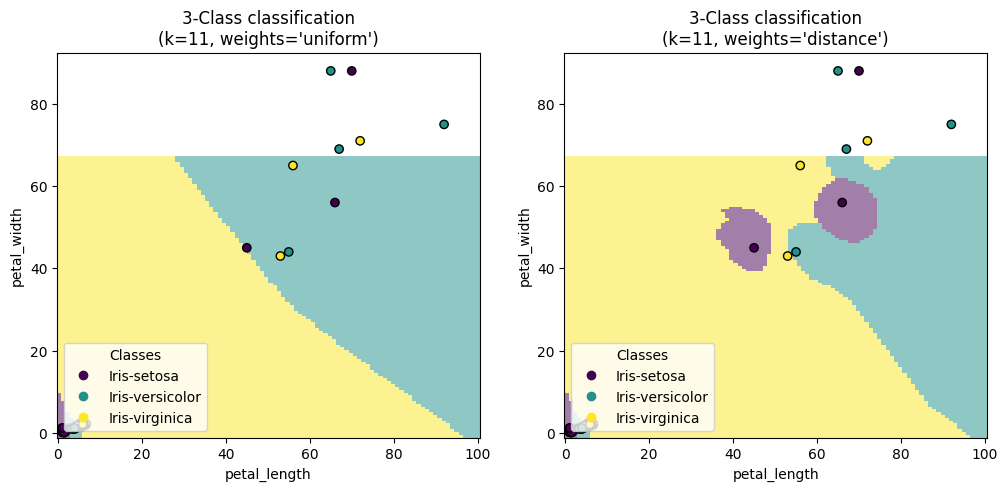

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import LocalOutlierFactor # importing LocalOutlierFactor
import psycopg2
import pymysql


def get_pg_data():
    conn = psycopg2.connect(
        host="pg-1c79828e-posgressqlpendata.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_lNd8P_-IyQzpcnKg3Ye",
        database="defaultdb",
        port=14572
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM bunga")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-3f95b8aa-mysqll.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_DYTBfDjLFuF2XVSXIqF",
        database="flowers_mysql",
        port=12288
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowermysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Assuming df_merge is already defined from previous cells
# If not, you'll need to define it here

# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["petal_length", "petal_width"]
X = df_merge[feature_columns]  # Using df_merge instead of df_cleaned
y = df_merge["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ubah nama kelas jadi angka


# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=90, contamination=0.1) # Defining the LOF model
outlier_labels = lof.fit_predict(X) # Fitting the LOF model and predicting outlier labels
df_merge["outlier"] = outlier_labels # Adding outlier labels to the dataframe

# Pisahkan data dengan outlier dan tanpa outlier
df_cleaned = df_merge[df_merge["outlier"] == 1].drop(columns=["outlier"]) # Creating a new dataframe without outliers


# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

Akurasi: 0.8148148148148148
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.56      0.83      0.67         6
 Iris-virginica       0.80      0.50      0.62         8

       accuracy                           0.81        27
      macro avg       0.79      0.78      0.76        27
   weighted avg       0.84      0.81      0.81        27



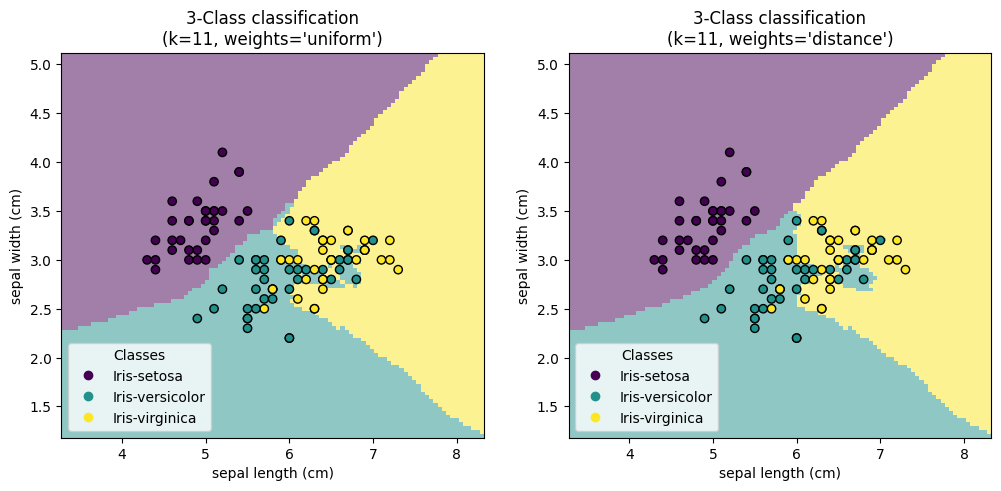

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# ----------------------------
# 1. Memuat Data (Gunakan dataset Iris)
# ----------------------------
iris = load_iris()
df_merged = pd.DataFrame(iris.data, columns=iris.feature_names)
df_merged["class"] = iris.target

# Mapping kelas ke nama spesies asli
class_mapping = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}
df_merged["class"] = df_merged["class"].map(class_mapping)

# ----------------------------
# 2. Preprocessing Data
# ----------------------------

# Pilih dua fitur utama untuk visualisasi decision boundary
feature_columns = ["sepal length (cm)", "sepal width (cm)"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengubah nama kelas menjadi angka

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),  # Pastikan target dalam bentuk numerik
    test_size=0.2,
    random_state=42
)

# ----------------------------
# 3. Model KNN
# ----------------------------

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# ----------------------------
# 4. Visualisasi Decision Boundary
# ----------------------------

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,  # Pastikan X_train digunakan agar sesuai dengan model yang dilatih
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    ax.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    ax.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()


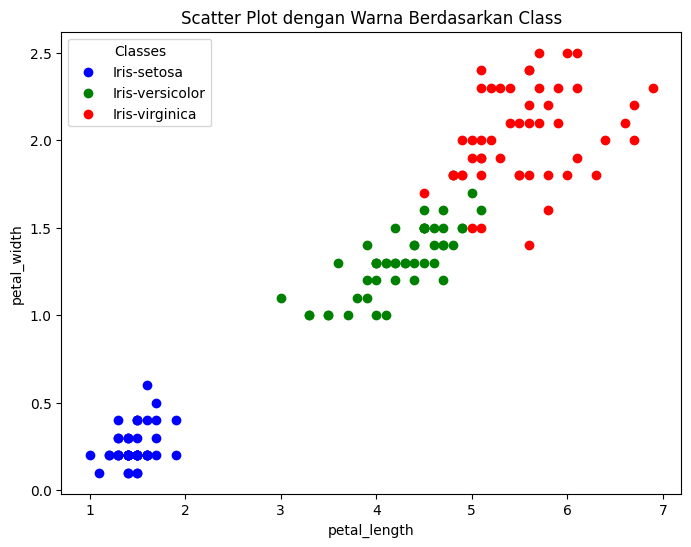

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets

# Load dataset Iris
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target

# Mapping nama kelas berdasarkan target
class_names = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
df['class'] = df['class'].map(class_names)

# Warna untuk setiap kelas
colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}

# Scatter plot
plt.figure(figsize=(8, 6))
for class_label, color in colors.items():
    subset = df[df['class'] == class_label]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], c=color, label=class_label)

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Scatter Plot dengan Warna Berdasarkan Class')
plt.legend(title="Classes")
plt.show()


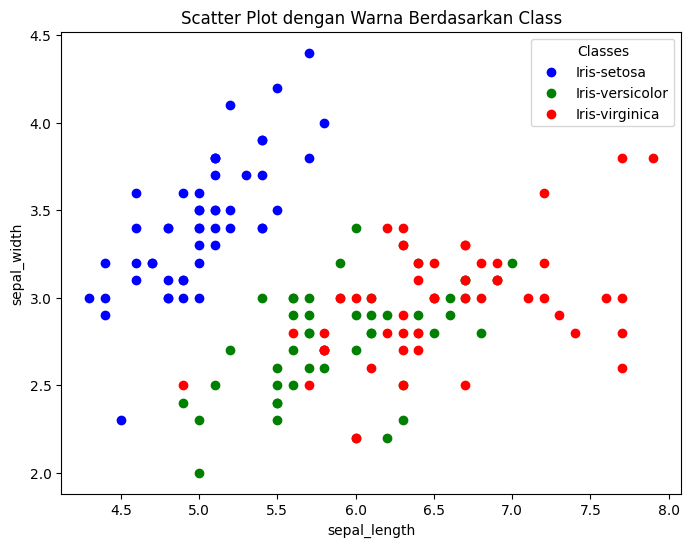

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load dataset Iris
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target

# Mapping nama kelas berdasarkan target
class_names = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
df['class'] = df['class'].map(class_names)

# Warna untuk setiap kelas
colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}

# Scatter plot
plt.figure(figsize=(8, 6))
for class_label, color in colors.items():
    subset = df[df['class'] == class_label]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], c=color, label=class_label)

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Scatter Plot dengan Warna Berdasarkan Class')
plt.legend(title="Classes")
plt.show()
